# Exercise: Titanic Dataset - Find and Visualize Missing Data

Datasets can often have missing data, which can cause problems when we perform machine learning. Missing data can be hard to spot at a first glance.

Our scenario uses a list of passengers on the failed maiden voyage of the Titanic. We want to know which factors predicted passenger survival. For our first task, which we perform here, we check whether our dataset has missing information.

This tutorial relies on the **matplotlib** Python visualization library to build data graph resources. Depending on the 
environment you use to execute the code in this notebook, you might need to install that library to proceed.

## Preparing data

Let's use Pandas to load the dataset and take a cursory look at it:

In [1]:
import pandas as pd
!pip install missingno

# Load data from our dataset file into a pandas dataframe
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
dataset = pd.read_csv('titanic.csv', index_col=False, sep=",", header=0)

# Let's take a look at the data
dataset.head()


--2025-03-14 08:31:49--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.001s  

2025-03-14 08:31:49 (72.4 MB/s) - ‘titanic.csv’ saved [61194/61194]

--2025-03-14 08:31:51--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now, we'll see the number of samples and columns in the data set:



In [2]:
# Shape tells us how many rows and columns we have
print(dataset.shape)

(891, 12)


We have data for 891 passengers, each described by 12 different variables.

## Finding Missing Data

Do we have a complete dataset?

No, but we know from historical records that there were more than 2000 people on the Titanic. We're clearly missing information on more than 1000 people! 

How can we tell if the available data is complete?

We could print the entire dataset, but this might involve human error. It would become impractical with this many samples.

A better option would use `pandas` to report the columns that have "empty" cells:

In [3]:
# Calculate the number of empty cells in each column
# The following line consists of three commands. Try
# to think about how they work together to calculate
# the number of missing entries per column
missing_data = dataset.isnull().sum().to_frame()

# Rename column holding the sums
missing_data = missing_data.rename(columns={0:'Empty Cells'})

# Print the results
print(missing_data)

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               2


It looks like we don't know the age of 177 passengers, and we don't know if two passengers even embarked.

Cabin information for a whopping 687 persons is also missing.

## Missing Data Visualizations

It can sometimes help if we can find some kind of pattern in the missing data.   

We can plot the absence of data in a few ways. One of the most helpful is to literally plot gaps in the dataset:

Matplotlib is building the font cache using fc-list. This may take a moment.


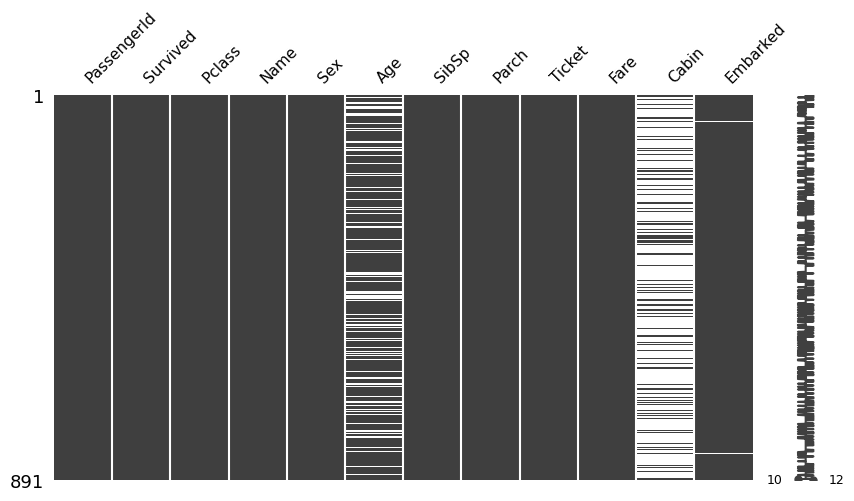

In [4]:
import missingno as msno

# Plot a matrix chart, set chart and font size
msno.matrix(dataset, figsize=(10,5), fontsize=11)

The horizontal white bars in the graph show missing data. Here, the patterns aren't visually clear, but maybe many passengers with missing `Age` information are also missing `Cabin` information.

## Identifying Individual Passengers with Missing Information.

Let's use pandas to get a list of passengers of unknown age:

In [5]:
# Select Passengers with unknown age
# Notice how we use .isnull() rows with no value
unknown_age = dataset[dataset["Age"].isnull()]

# Print only the columns we want for the moment (to better fit the screen)
# limit output to 20 rows
unknown_age[["PassengerId","Name", "Survived", "Age"]][:20]

,PassengerId,Name,Survived,Age
5,6,"Moran, Mr. James",0,NaN
17,18,"Williams, Mr. Charles Eugene",1,NaN
19,20,"Masselmani, Mrs. Fatima",1,NaN
26,27,"Emir, Mr. Farred Chehab",0,NaN
28,29,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN
29,30,"Todoroff, Mr. Lalio",0,NaN
31,32,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN
32,33,"Glynn, Miss. Mary Agatha",1,NaN
36,37,"Mamee, Mr. Hanna",1,NaN
42,43,"Kraeff, Mr. Theodor",0,NaN


This technique lists the passengers with missing `Cabin` or `Embarked` information as well. Let's combine these using an `AND`, to see how many passengers are missing both Cabin and Age information

In [6]:
# Find those passengers with missing age or cabin information
missing_age = dataset["Age"].isnull()
missing_cabin = dataset["Cabin"].isnull()

# Find those passengers missing both
unknown_age_and_cabin = dataset[missing_age & missing_cabin]
print("Number of passengers missing age and cabin information:", len(unknown_age_and_cabin))

Number of passengers missing age and cabin information: 158


Our suspicions were correct - most passengers missing age information are also missing cabin information. 

Normally, from here, we would want to know _why_ we have this issue. A good hypothesis is that information was not collected carefully enough for the passengers who used the cheap tickets. 

Let's plot a histogram of ticket classes, and another of just people missing information. 

Text(0, 0.5, 'Passenger Count')

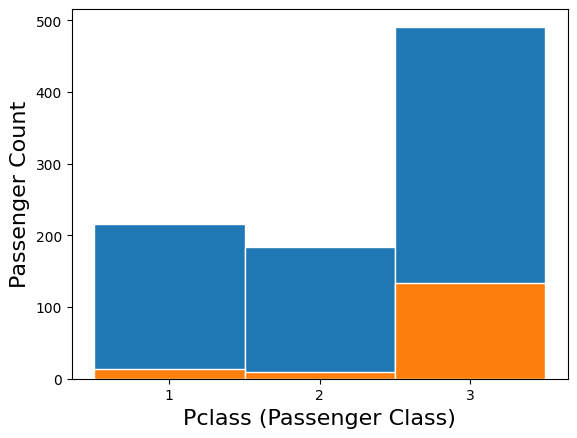

In [7]:
import matplotlib.pyplot as plt

plt.hist((dataset.values[:,2]),bins=[0.5, 1.5, 2.5, 3.5],edgecolor="white")
plt.hist((unknown_age_and_cabin.values[:,2]),bins=[0.5, 1.5, 2.5, 3.5],edgecolor="white")
plt.xticks([1, 2, 3])
plt.xlabel("Pclass (Passenger Class)", fontsize=16)
plt.ylabel("Passenger Count", fontsize=16)

It seems that those passengers with missing information typically used the cheaper tickets. These sorts of biases might cause problems in real-world analyses.

## Missing as Zero

Additionally, some datasets may have missing values that appear as zero. While the Titanic dataset doesn't have this problem, let's see how that would work here.

In [8]:
import numpy as np

# Print out the average age of passengers for whom we have age data
mean_age = np.mean(dataset.Age)
print("The average age on the ship was", mean_age, "years old")

# Now, make another model where missing ages contained a '0'
dataset['Age_2'] = dataset['Age'].fillna(0)
mean_age = np.mean(dataset.Age_2)
print("The average age on the ship was", mean_age, "years old")

The average age on the ship was 29.69911764705882 years old
The average age on the ship was 23.79929292929293 years old


What happened here? Our analyses consider the values of `0` not as 'missing' values, but instead as actual age values.

This shows that it can be important to time the review of your raw data before you run the analyses. Another fast way to get a feel for a dataset is to graph its distribution:

Text(0, 0.5, 'Passenger Count')

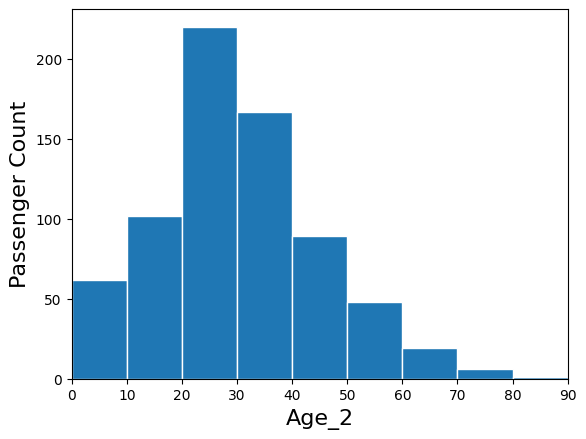

In [9]:
plt.hist(dataset["Age"],bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],edgecolor="white")
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.xlim([0, 90])
plt.xlabel("Age_2", fontsize=16)
plt.ylabel("Passenger Count", fontsize=16)

Here, we see an unlikely number of very young children. This would be cause for further inspection of the data, to hopefully spot the fact that the missing ages appear as zeros.

## Handling Missing Data

We have many ways to address missing data, each with pros and cons.

Let's take a look at the less complex options:

### Option 1: Delete data with missing rows

For a model that cannot handle missing data, the most prudent thing to do is to remove rows that have information missing.

Let's remove some data from the `Embarked` column, which only has two rows with missing data.

In [10]:
# Create a "clean" dataset, where we cumulatively fix missing values
# Start by removing rows ONLY where "Embarked" has no values
print(f"The original size of our dataset was", dataset.shape)
clean_dataset = dataset.dropna(subset=["Embarked"])
clean_dataset = clean_dataset.reindex()

# How many rows do we have now?
print("The shape for the clean dataset is", clean_dataset.shape)

The original size of our dataset was (891, 13)
The shape for the clean dataset is (889, 13)


We can see that this removed the offending two rows from our new, clean dataset.

### Option 2: Replace empty values with the mean or median for that data.

Sometimes, our model cannot handle missing values, and we also cannot afford to remove too much data. In this case, we can sometimes fill in missing data with an average calculated on the basis of the rest of the dataset. Note that imputing data like this can affect model performance in a negative way. Usually, it's better to simply remove missing data, or to use a model designed to handle missing values.

Here, we impute data for the `Age` field. We use the mean `Age` from the remaining rows, given that >80% of these have values:

In [11]:
# Calculate the mean value for the Age column
mean_age = clean_dataset["Age"].mean()

print("The mean age is", mean_age)

# Replace empty values in "Age" with the mean calculated above
clean_dataset["Age"].fillna(mean_age, inplace=True)

# Let's see what the clean dataset looks like now
print(clean_dataset.isnull().sum().to_frame().rename(columns={0:'Empty Cells'}))

The mean age is 29.64209269662921
             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               0
Age_2                  0


The `Age` field has no longer has empty cells.

### Option 3: Assign a new category to unknown categorical data

The `Cabin` field is a categorical field because the Titanic cabins have a finite number of possible options. Unfortunately, many records have no cabin listed.

For this exercise, it makes perfect sense to create an `Unknown` category, and assign it to the cases where the cabin is unknown:

In [12]:
# Assign unknown to records where "Cabin" is empty
clean_dataset["Cabin"].fillna("Unknown", inplace=True)

# Let's see what the clean dataset looks like now
print(clean_dataset.isnull().sum().to_frame().rename(columns={0:'Empty Cells'}))

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Age_2                  0


That's it! No more missing data!

We only lost two records (where `Embarked` was empty).

That said, we had to make some approximations to fill the missing gaps for the `Age` and `Cabin` columns. Those will certainly influence the performance of any model we train on this data.

## Summary

Missing values can affect the way a Machine Learning model works in a negative way. It's important to quickly verify the existence of data gaps and the locations of those gaps.

You can now get a big picture of what is missing. Using lists and charts, you can select only those items that you must address.

In this exercise, we practiced:

- Finding and visualizing missing dataset values with the `pandas` and `missingno` packages.
- Checking whether a dataset uses the value '0' to represent missing values.
- Handling missing data in three ways:removal of rows that contain missing values, replacement of the missing values with the mean or median of that particular feature, and creation of a new `Unknown` category when dealing with categorical data.
